# desc-wfmon/fundata.ipynb: Viewing parsl function data

We use the classe *FunctionData* in desc-wfmon to examine task state transitions in parsl running.

Copy this file to the run directory or add the appropriate argument where the class is constructed.

First setup to use the local install area and then import the the system (sysmon) and process (wfmon) explorers. 

See desc-wfmon/install.ipynb to install that package in the local directory and create the setup on the first line. 

In [1]:
!pwd
%run install/setup.py
import sys
import os
print(f"Python version is {sys.version}")
print(f"Python search path starts with {sys.path[0]}:{sys.path[1]}:{sys.path[2]}")
import pandas
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import desc.wfmon
for pkg in [desc.wfmon]:
    print(f"{pkg} version is {pkg.__version__}")

/global/u2/d/dladams/desc/rundirs/test20
Python version is 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
Python search path starts with ./install/noconda:/global/u2/d/dladams/desc/rundirs/test20:
TestMonDbReader:ctor: Done.
<module 'desc.wfmon' from '/global/u2/d/dladams/desc/rundirs/test20/./install/noconda/desc/wfmon/__init__.py'> version is 0.0.16.dev2


## Configuration
Configure matplotlib to pretty-up the plots, define their size and aspect ratio and add a label. If undefined, the latter is taken from the current directory name.

In [2]:
plt.rc('font', size=16)
plt.rc('savefig', facecolor='white', bbox='tight')
plt.rc('axes', titlesize='medium')

pdx = 20
pdy = 6

label = None
if label is None:
    label = os.path.basename(os.getcwd())
print(f"Label: {label}")

fin = open('README.txt', 'r')
sttl = fin.readline().rstrip()

Label: test20


## Fetch data
We create a *FunctionData* object that reads the function data logs annd contructs a dataframe with the time at which each task enters a series of processing states (column names). No arguments are needed if this notebook is run from the production directory and the logs are in their expected loctions.

In [3]:
fda = desc.wfmon.FunctionData()
print(fda.data)

      taskid              start         postimport          mainstart  \
0        0.0  1647038200.625465  1647038204.594503  1647038204.594518   
1        1.0  1647038177.764833  1647038181.650501  1647038181.650516   
2        2.0   1647038177.71637  1647038181.536801  1647038181.536819   
3        3.0  1647038177.561471  1647038181.521129  1647038181.521146   
4        4.0  1647038168.777422  1647038172.657229  1647038172.657243   
...      ...                ...                ...                ...   
2154  2154.0  1647038524.906698  1647038527.510408  1647038527.510416   
2155  2155.0  1647038524.906754  1647038527.604866  1647038527.604874   
2156  2156.0  1647038524.906725  1647038527.605768  1647038527.605777   
2157  2157.0  1647038546.386561  1647038549.023673  1647038549.023682   
2158  2158.0  1647038568.882771  1647038571.578773  1647038571.578782   

           loadfunction    executefunction               dump  \
0      1647038204.59464   1647038211.39476  1647038292.755

## Create plots.

We create plots showing the distribution of times for which the task stays in each state by plotting the difference between times entering the subsequent and current state.

test20
['start', 'postimport', 'mainstart', 'loadfunction', 'executefunction', 'dump', 'done']


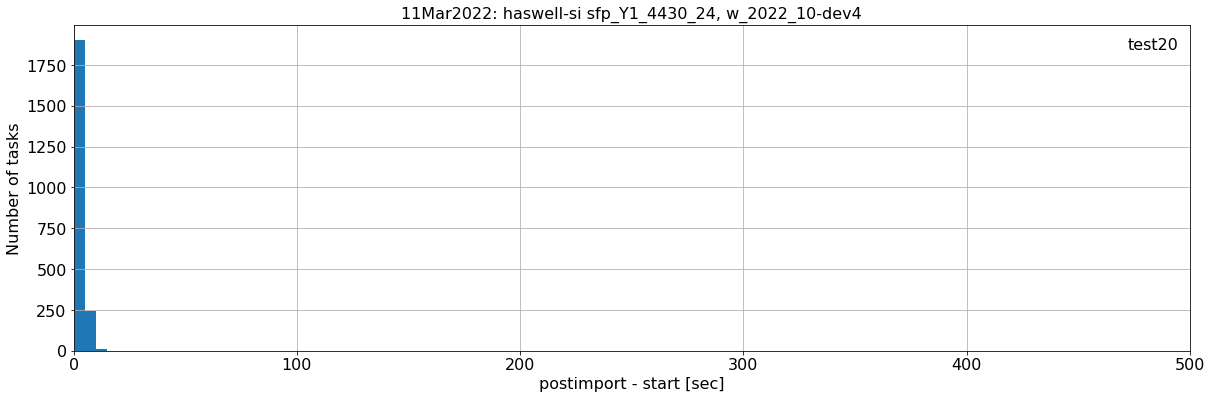

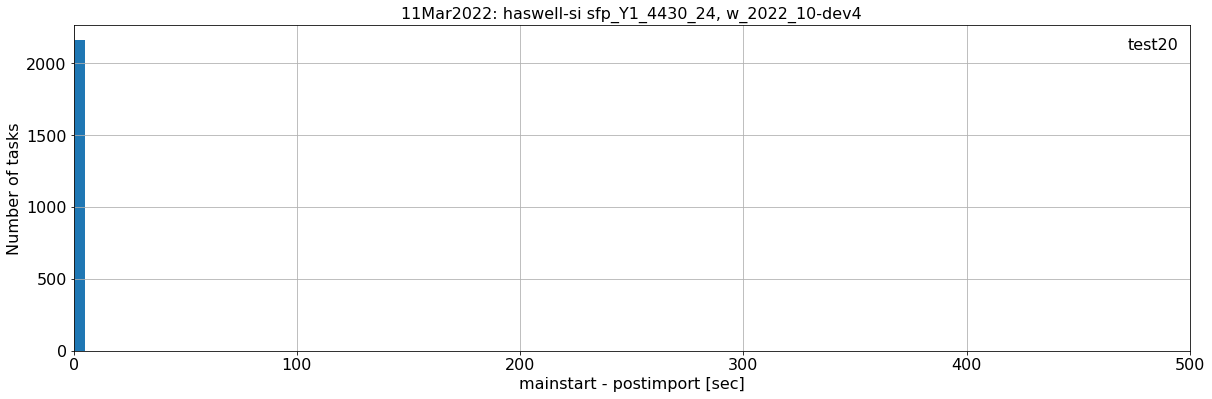

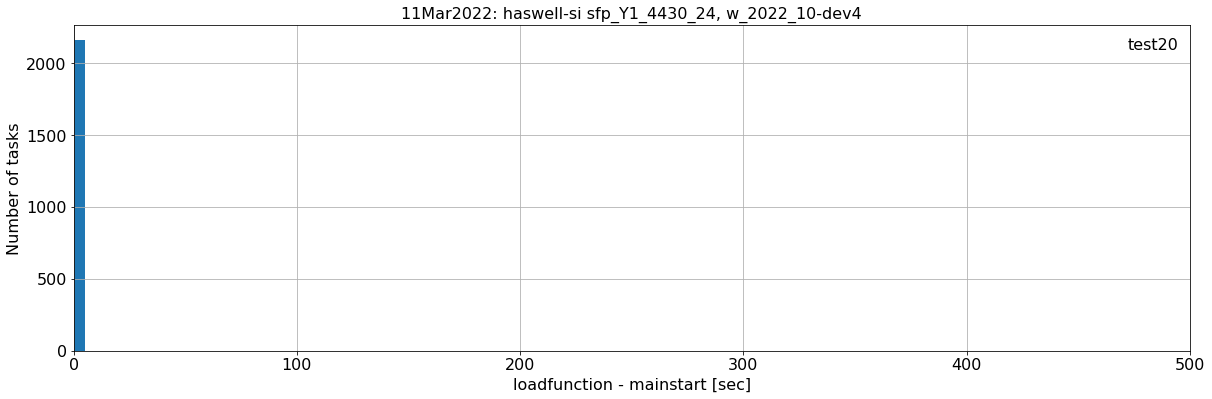

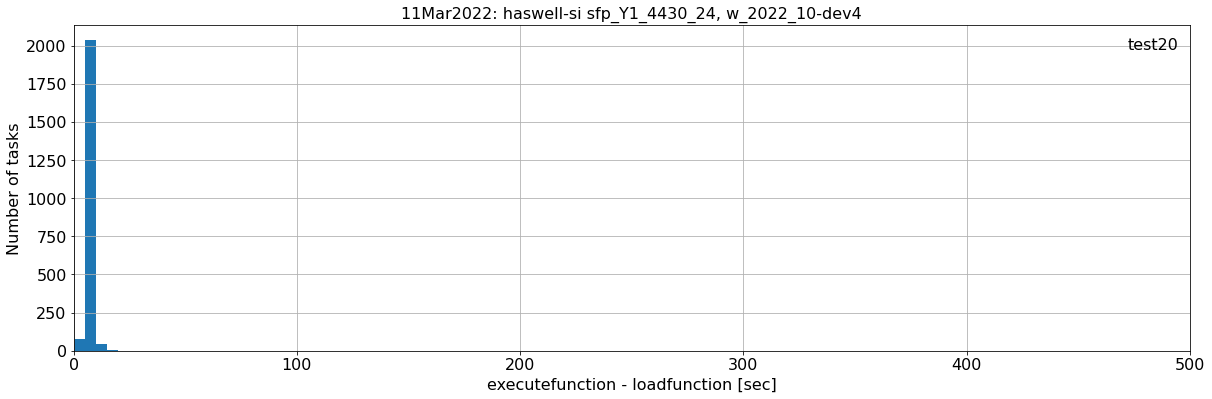

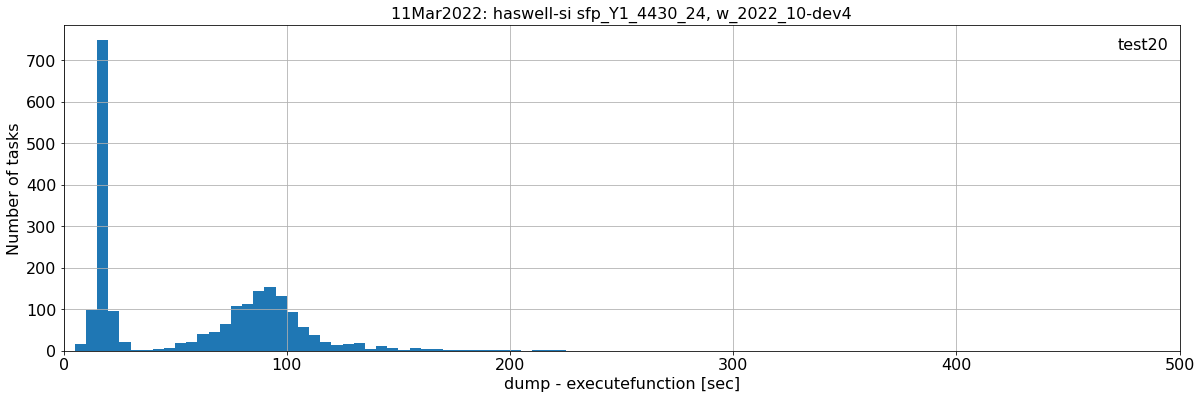

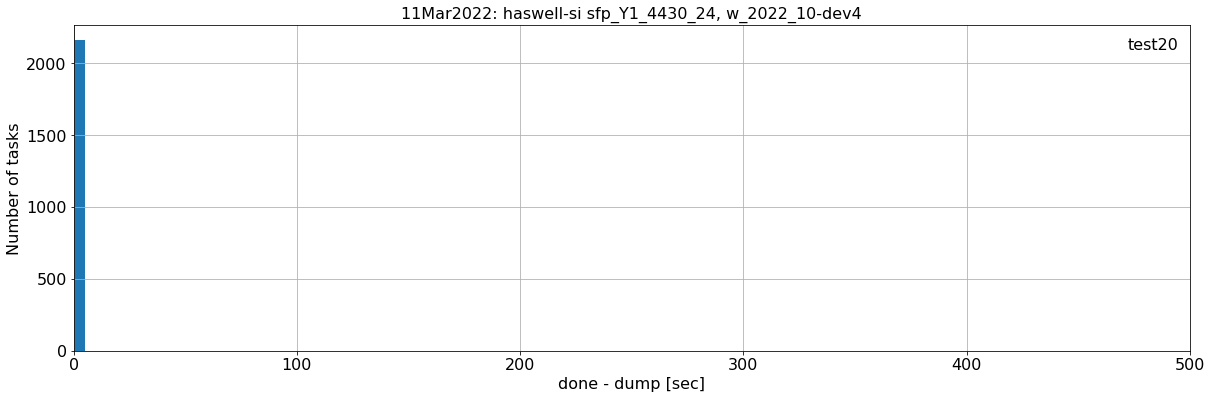

In [4]:
sdir = os.path.basename(os.getcwd())
print(sdir)
nbin = 100
t1 = 0.0
t2 = 500.0
delt = 1.e-5*(t2-t1)
cols = list(fda.data.columns)[1:]
print(cols)
c12s = []
for icol in range(len(cols)-1):
    c12s.append([cols[icol], cols[icol+1]])
# Uncomment the following to look at other time differences.
#c12s = [['start', 'done'], ['loadfunction', 'executefunction'], ['start', 'loadfunction']]
for [c1, c2] in c12s:
    plt.figure(figsize=(pdx, pdy))
    dif = (fda.data[c2] - fda.data[c1]).clip(lower=t1+delt, upper=t2-delt)
    plt.hist(bins=nbin, range=[t1,t2], x=dif)
    plt.xlabel(f"{c2} - {c1} [sec]")
    plt.ylabel(f"Number of tasks")
    plt.title(sttl)
    plt.grid(True)
    plt.xlim(t1, t2)
    plt.text(0.99, 0.96, label, horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
    plt.savefig(f"{sdir}-{c1}-{c2}.png")
    plt.show()
    print()